## Imports

In [1]:
from ragas.testset import TestsetGenerator

import os
import openai

from openai import OpenAI

client = OpenAI()

/opt/anaconda3/envs/ragas/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from llama_index import download_loader, SimpleDirectoryReader


In [3]:
import matplotlib.pyplot as plt

## Assessing current state of test date generation

In [63]:
!pwd

/Users/shahules/belar/experimental


In [27]:

ArxivReader = download_loader("ArxivReader")

loader = ArxivReader() #uses simpledirectory reader under the hood, hence need modification to laod pages properly

In [4]:
# documents = loader.load_data("retrieval augmented generation AND large language model",max_results=20,papers_dir='./arxiv-papers')

In [4]:
reader = SimpleDirectoryReader("/Users/shahules/Downloads/AMNESTY/",num_files_limit=20)
documents = reader.load_data()

## SimpleDirectoryReader?

In [5]:
len(documents)

248

In [6]:
documents[0].get_metadata_str()

'page_label: I\nfile_name: AFR4471572023ENGLISH.pdf\nfile_path: /Users/shahules/Downloads/AMNESTY/AFR4471572023ENGLISH.pdf\ncreation_date: 2023-11-30\nlast_modified_date: 2023-11-30\nlast_accessed_date: 2023-11-30'

In [7]:
# print(documents[14].get_metadata_str())
# print("CONTENT")
# print(documents[14].get_content())
# print(len(documents[14].get_content().split(' ')))

(array([ 5.,  3.,  6., 13., 28., 21., 39., 10.,  5.,  1.]),
 array([  10. ,  113.1,  216.2,  319.3,  422.4,  525.5,  628.6,  731.7,
         834.8,  937.9, 1041. ]),
 <BarContainer object of 10 artists>)

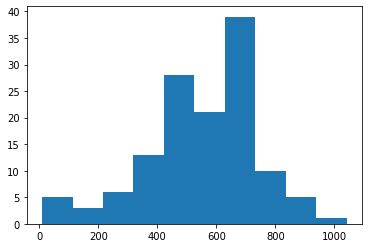

In [8]:
plt.hist([len(doc.get_content().split()) for doc in documents])

In [8]:
test_dist =  {
    "simple": 0.3,
    "reasoning": 0.25,
    "multi_context": .2,
    "conditional": 0.25,
}

In [9]:
testsetgenerator = TestsetGenerator.from_default(testset_distribution=test_dist,chunk_size=512)


In [10]:
!pwd

/Users/shahules/belar/experimental


In [11]:
test_df = testsetgenerator.generate(documents,test_size=20)

  0%|                                                            | 0/20 [00:00<?, ?it/s]

Len of text chunks 2 450
seed question ['What actions should all companies take to reduce emissions?', 'Who should stop financing and investing in new projects that drive fossil fuel expansion?']
{'reason': 'The question is too broad and does not specify the type of company or the type of emissions, making it potentially ambiguous and open to multiple interpretations.', 'verdict': 'No'}
rewritten question What actions should all companies take to reduce emissions according to the context?
{'reason': 'The question is vague and does not specify which context it is referring to.', 'verdict': 'No'}
{'reason': 'The question is vague and does not specify who it is referring to, making it unclear and open to multiple interpretations.', 'verdict': 'No'}
rewritten question Who should stop financing and investing in new projects that drive fossil fuel expansion, according to the context?
{'reason': 'The question is vague and does not specify the context it is referring to, making it unclear and 

  5%|██▌                                                 | 1/20 [00:48<15:13, 48.09s/it]

{'reason': "The question is too vague as it does not specify who the 'who' is referring to. It could be a person, a group, a country, etc.", 'verdict': 'No'}
rewritten question Who has expressed fear about the USA Supreme Court ruling on abortion impacting other countries?
{'reason': "The question is too vague as it does not specify who the 'who' is referring to. It could be a person, a group, a country, etc.", 'verdict': 'No'}
Len of text chunks 3 482
seed question ['What is the role of fossil fuel companies in driving global warming?', 'Who are the largest emitters of GHG emissions in the Americas?']
{'reason': 'The question is specific and refers to a well-known issue, making it clear and answerable.', 'verdict': 'Yes'}
{'reason': 'The question is specific and refers to a well-known database, making it clear and answerable.', 'verdict': 'Yes'}


 15%|███████▊                                            | 3/20 [01:28<07:46, 27.44s/it]

{'reason': 'The question is specific and refers to a well-defined topic, making it clear and answerable.', 'verdict': 'Yes'}
{'reason': 'The question is specific and refers to a particular database and a specific region, making it clear and answerable.', 'verdict': 'Yes'}


 30%|███████████████▌                                    | 6/20 [01:48<03:25, 14.65s/it]

Len of text chunks 3 338
Len of text chunks 2 376
Len of text chunks 2 414
Len of text chunks 2 289
seed question ['What did Amnesty International call on its supporters to do in response to the killing of the Ogoni 9?', 'Who did the collective Mujeres Amazónicas Defensoras de la Selva de las Bases frente al Extractivismo call on Ecuador to protect?']
{'reason': 'The question is specific and refers to a well-known event and organization, making it clear and answerable.', 'verdict': 'Yes'}
{'reason': 'The question is specific and refers to a well-known event and organization, making it clear and answerable.', 'verdict': 'Yes'}


 50%|█████████████████████████▌                         | 10/20 [07:19<08:33, 51.36s/it]

{'reason': 'The question is specific and refers to a particular group and event, making it clear and answerable.', 'verdict': 'Yes'}
{'reason': 'The question is vague and does not specify which collective or incident it is referring to.', 'verdict': 'No'}
Len of text chunks 2 335
Len of text chunks 3 497
seed question ['What are the recommendations made by Amnesty International to the Special Rapporteur on Human Rights Defenders?', 'Who are the target audience of the two books created by Amnesty International on child rights?']
{'reason': 'The question is specific and refers to a well-known organization and a specific role, making it clear and answerable.', 'verdict': 'Yes'}


 75%|██████████████████████████████████████▎            | 15/20 [07:53<02:27, 29.48s/it]

{'reason': 'The question is specific and refers to a particular set of books by a known organization, making it clear and answerable.', 'verdict': 'Yes'}


21it [08:03, 16.78s/it]                                                                 

Len of text chunks 2 404
seed question ['What is the right to truth?', 'Who has the right to know the truth regarding human rights violations?']
{'reason': 'The question is clear and refers to a specific concept, making it answerable.', 'verdict': 'Yes'}
{'reason': 'The question is specific and refers to a particular human rights issue, making it clear and answerable.', 'verdict': 'Yes'}


28it [08:51, 12.53s/it]

{'reason': 'The question is clear and specific, referring to a particular topic of human rights violations.', 'verdict': 'Yes'}
{'reason': 'The question is clear and specific, referring to a particular aspect of human rights, making it answerable.', 'verdict': 'Yes'}


36it [09:54, 10.61s/it]

Len of text chunks 1 257
seed question ['What does the Act prioritize over the investigation and disclosure of facts?']
{'reason': 'The question is vague and does not specify which Act it is referring to, making it unclear and potentially unanswerable.', 'verdict': 'No'}
rewritten question What does the Act prioritize over the investigation and disclosure of facts according to the context provided?
{'reason': "The question is vague and does not specify which 'Act' it is referring to, making it unclear and potentially unanswerable without further context.", 'verdict': 'No'}
Len of text chunks 2 338
Len of text chunks 3 458
seed question ['What is the purpose of Article 207.3 in the Russian Criminal Code?', "Why does the prosecution consider statements contrary to the official position as 'false' under Article 207.3?"]
{'reason': 'The question is specific and refers to a particular article in a specific legal code, making it clear and answerable.', 'verdict': 'Yes'}
{'reason': 'The quest

45it [10:39,  8.34s/it]

{'reason': 'The question is specific and refers to a particular legal article, making it clear and answerable.', 'verdict': 'Yes'}
{'reason': 'The question is specific and refers to a particular legal article, making it clear and answerable.', 'verdict': 'Yes'}


55it [11:01,  5.98s/it]

Len of text chunks 1 308
seed question ['Why are civil society organizations in Nicaragua being decimated?', 'How are human rights defenders in Venezuela being affected by repression and criminalization?']
{'reason': 'The question is specific and refers to a current event in a specific location, making it clear and answerable.', 'verdict': 'Yes'}
{'reason': 'The question is specific and refers to a well-known situation in a specific country, making it clear and answerable.', 'verdict': 'Yes'}


66it [11:36,  4.92s/it]

{'reason': 'The question is specific and refers to a well-known issue, making it clear and answerable.', 'verdict': 'Yes'}
{'reason': 'The question is too broad and does not specify a particular time or context, making it potentially ambiguous and open to multiple interpretations.', 'verdict': 'No'}
Len of text chunks 2 334
seed question ['What is the purpose of the Ramsar sites designation?', 'Where was the UN Conference on Biological Diversity (COP15) held in 2022?']
{'reason': 'The question is specific and refers to a well-known international conservation effort, making it clear and answerable.', 'verdict': 'Yes'}
{'reason': 'The question is specific and refers to a well-known environmental designation, making it clear and answerable.', 'verdict': 'Yes'}


78it [17:16, 13.61s/it]

{'reason': 'The question is specific and refers to a well-known event, making it clear and answerable.', 'verdict': 'Yes'}
{'reason': 'The question is specific and refers to a well-known event and its location in a specific year, making it clear and answerable.', 'verdict': 'Yes'}


91it [17:35,  9.17s/it]

Len of text chunks 3 406
Len of text chunks 3 511
seed question ['What is the purpose of the agreement known as 30x30?', "Who failed to explicitly recognize Indigenous Peoples' lands and territories as a distinct category of protected area at COP15?"]
{'reason': 'The question refers to a specific agreement by its name, making it clear and answerable.', 'verdict': 'Yes'}


105it [17:51,  6.29s/it]

{'reason': 'The question is specific and refers to a well-known event (COP15) and a specific issue, making it clear and answerable.', 'verdict': 'Yes'}


120it [18:00,  4.26s/it]

Len of text chunks 2 397
Len of text chunks 1 297
seed question ['What are some effects of abortion criminalization?', 'Who is most affected by the criminalization of abortion?']
{'reason': 'The question is clear and specific, referring to a particular topic that can be researched and answered.', 'verdict': 'Yes'}
{'reason': 'The question is specific and refers to a well-known social issue, making it clear and answerable.', 'verdict': 'Yes'}


136it [20:02,  5.44s/it]

{'reason': 'The question is too broad and does not specify a particular region, country, or demographic, making it potentially ambiguous and open to multiple interpretations.', 'verdict': 'No'}
rewritten question Who is most affected by the criminalization of abortion?
{'reason': 'The question is too broad and does not specify a particular region, country, or demographic, making it potentially ambiguous and open to multiple interpretations.', 'verdict': 'No'}
Len of text chunks 2 338
Len of text chunks 1 20
Len of text chunks 2 339
seed question ['What responsibilities do social media companies have in relation to human rights?', 'How can social media companies ensure that all users can exercise their rights online?']
{'reason': 'The question is clear and specific, referring to the responsibilities of a defined group (social media companies) in relation to a defined topic (human rights).', 'verdict': 'Yes'}
{'reason': 'The question is specific and clear, referring to a particular topic

153it [21:55,  5.87s/it]

{'reason': 'The question is clear and specific, referring to a particular group (social media companies) and a specific issue (ensuring online rights for all users).', 'verdict': 'Yes'}
{'reason': "The question is clear and specific, referring to the role of social media companies in protecting users' rights online, making it answerable.", 'verdict': 'Yes'}


171it [22:25,  4.41s/it]

Len of text chunks 4 420
Len of text chunks 3 494
seed question ['What were some of the abuses documented by Amnesty International during the tournament in Qatar?', 'When did the government of Qatar take steps to repeal certain restrictions on migrant workers?']
{'reason': 'The question is specific and refers to a well-known organization and event, making it clear and answerable.', 'verdict': 'Yes'}
{'reason': 'The question is specific and refers to a well-known organization and a specific issue, making it clear and answerable.', 'verdict': 'Yes'}


190it [23:31,  4.10s/it]

{'reason': 'The question is specific and refers to a well-known event, making it clear and answerable.', 'verdict': 'Yes'}
{'reason': 'The question is specific and refers to a well-known event, making it clear and answerable.', 'verdict': 'Yes'}


210it [24:29,  7.00s/it]


In [12]:
test_df.to_pandas()

,seed_question,question,context,answer,question_type,episode_done,evolution_elimination
0,What impact has the USA Supreme Court ruling o...,What are the global implications of the USA Su...,"- In 2022, the USA Supreme Court handed down a...",The global implications of the USA Supreme Cou...,conditional,True,False
1,What is the role of fossil fuel companies in d...,Which companies are the main contributors to G...,"- Fossil fuel companies, whether state or priv...","According to the Carbon Majors database, the m...",reasoning,True,False
2,Who are the largest emitters of GHG emissions ...,Which private companies in the Americas are th...,The private companies responsible for the most...,The largest private companies in the Americas ...,reasoning,True,False
3,What did Amnesty International call on its sup...,What action did Amnesty International urge its...,Amnesty International called on its vast netwo...,Amnesty International urged its supporters to ...,conditional,True,True
4,What are the recommendations made by Amnesty I...,What are the recommendations made by Amnesty I...,Amnesty International recommends that the Spec...,The recommendations made by Amnesty Internatio...,simple,True,None
5,Who are the target audience of the two books c...,Who are the target audience of the two books c...,Amnesty International has therefore created tw...,The target audience of the two books created b...,simple,True,None
6,What is the right to truth?,Which right guarantees access to comprehensive...,26. The Act raises serious questions about its...,The right that guarantees access to comprehens...,multi_context,True,True
7,Who has the right to know the truth regarding ...,Who has the right to be fully informed about h...,- The victims of gross human rights violations...,The victims of gross human rights violations a...,multi_context,False,False
8,What is the purpose of Article 207.3 in the Ru...,When can individuals be found guilty under Art...,- As long as their statements are contrary to ...,Individuals can be found guilty under Article ...,conditional,True,False
9,Why does the prosecution consider statements c...,When does the prosecution consider statements ...,- As long as their statements are contrary to ...,The prosecution considers statements contrary ...,conditional,True,False


In [13]:
test_df.to_pandas().to_csv("amnesty_reports.csv")

In [51]:
x = [1,2,3]

In [52]:
x.index(4)

ValueError: 4 is not in list

In [50]:
test_df

NameError: name 'test_df' is not defined

**Observations**
- Conditional question evol is working
- reasoning/multi context are not working as expected
- Almost all questions are closed endeded 
- Almost all questions start with "What"

## Experiments

In [13]:
from llama_index.readers.file.markdown_reader import MarkdownReader
from llama_index.schema import Document
from typing import List, Dict, Optional
from pathlib import Path
import re
import os

In [14]:
class RagasMdReader(MarkdownReader):
    
    @staticmethod
    def get_file_metadata(path):
        
        return {"file_name":os.path.basename(path),
                "dirname":os.path.dirname(path)}
        
    
    def get_local_metadata(self, text):
        

        return_dict = {}
        pattern = r'---\s*title:\s*(.+?)(?:\s*description:\s*"(.*?)")?\s*---'
        match = re.findall(pattern, text)
        if match:
            title,desc = match[0]
            return_dict['title'] = title
            return_dict['description'] = desc if desc else None
            
        return return_dict

        
    
        
    
    def load_data(
        self, file: Path, extra_info: Optional[Dict] = None
    ) -> List[Document]:
        """Parse file into string."""
        
        with open(file, "r", encoding="utf-8") as f:
            content = f.read()
        if self._remove_hyperlinks:
            content = self.remove_hyperlinks(content)
        if self._remove_images:
            content = self.remove_images(content)
            
        local_metadata = self.get_local_metadata(content)

        extra_info = dict(extra_info,**local_metadata) if local_metadata else extra_info
        return [Document(text=content,metadata=extra_info)]
        
        


In [15]:
md_reader = RagasMdReader(remove_hyperlinks=False)

In [16]:
def llm2(prompt, **kwargs):
    response = client.chat.completions.create(
        model=kwargs.get("model", "gpt-3.5-turbo"),
        messages=[{"role": "system", "content": prompt}],
        temperature=kwargs.get("temperature", 0),
        top_p=kwargs.get("top_p", 1),
        frequency_penalty=kwargs.get("frequency_penalty", 0.0),
        presence_penalty=kwargs.get("presence_penalty", 0.0),
        max_tokens=kwargs.get("max_tokens", 500),
        n=kwargs.get("n", 1),
    )
    return response

In [17]:
from ragas.testset.prompts import SEED_QUESTION, EVOLUTION_ELIMINATION, REWRITE_QUESTION, FILTER_QUESTION

In [18]:
# !ls /Users/shahules/Myprojects/rag-experiments/gitlab-handbook/data/handbook/

In [19]:
dirs = [
    "/Users/shahules/Myprojects/rag-experiments/gitlab-handbook/data/handbook/leadership/",
    "/Users/shahules/Myprojects/rag-experiments/gitlab-handbook/data/handbook/company/",
    "/Users/shahules/Myprojects/rag-experiments/gitlab-handbook/data/handbook/infrastructure-standards/",
    "/Users/shahules/Myprojects/rag-experiments/gitlab-handbook/data/handbook/communication/",
    "/Users/shahules/Myprojects/rag-experiments/gitlab-handbook/data/handbook/security"
]
documents = []
for dir_path in dirs:
    loader = SimpleDirectoryReader(dir_path, 
                                   recursive=True,
                                  file_extractor={".md":md_reader},
                                file_metadata=RagasMdReader.get_file_metadata)
    
    documents.extend(loader.load_data())

In [20]:
len([doc for doc in documents if doc.metadata.get("file_name") is None ])

0

In [78]:
import re

# Sample text
text = """
---
title: "Ask Me Anything"
description: "Learn and ask questions at GitLab's Ask Me Anything (AMA) meetings"
---
"""

# Regular expression to capture title and description
pattern_optional_description = '---\s*title:\s*(.+?)(?:\s*description:\s*"(.*?)")?\s*---'

# Finding matches
matches = re.match(pattern_optional_description, text)

matches


In [79]:
matches is None

True

In [72]:
pattern = re.compile('---\s*title:\s*(.+?)(?:\s*description:\s*"(.*?)")?\s*---')
[m.groupdict() for m in pattern.finditer(text)]

[{}]

In [68]:
text = """
---
title: "Book clubs"
---

From time to time, we run internal book clubs on a book from one of our resource lists. All are welcome! However,
each club has a suggested audience to indicate roles to which the content is tailored.

- [Leadership]({{< ref "_index.md#books" >}})
- [Development](https://about.gitlab.com/handbook/engineering/development/#books)
"""

In [60]:
pattern_optional_description = r'---\s*title:\s*"(.+?)"\s*---'
re.findall(pattern,text)

[]

In [39]:
len(documents)

168

In [13]:
# documents[0].metadata

In [5]:
testset = testsetgenerator.generate(documents, test_size=50)


In [13]:
testset.to_pandas().to_csv("gitlab_communication_company_v2.csv")

In [4]:
# testset.to_pandas()

In [20]:
q1="How should I use my notification settings in Slack?"
q2="What's the best way to manage Slack notification settings for efficient communication and minimal disruptions?"


In [21]:
prompt = EVOLUTION_ELIMINATION.prompt.template.format(question1=q1, question2=q2)

## Create multi context
- find similar docs using metadata 


In [116]:
from langchain.embeddings import OpenAIEmbeddings
from llama_index.indices.query.embedding_utils import get_top_k_embeddings

In [103]:
model = OpenAIEmbeddings()

In [112]:
titles = [doc.metadata.get('title').strip('"') for doc in documents if doc.metadata]

In [114]:
embeddings = model.embed_documents(titles)

In [170]:
k=24

In [171]:
scores, indices = get_top_k_embeddings(embeddings[k],embeddings,similarity_cutoff=0.8)

In [172]:
print(f"Seach query :{titles[k]}\n Results: [{[titles[i] for i in indices[:5]]}")

Seach query :Top Cross-Functional Initiatives
 Results: [['Top Cross-Functional Initiatives', 'Building High Performing Teams', 'Product Career Development Framework Working Group', 'Leadership', 'Single Codebase Working Group']


## Merge documents based on meta-data

In [13]:
from langchain.prompts import HumanMessagePromptTemplate


In [14]:
REWRITE_QUESTION = HumanMessagePromptTemplate.from_template("""
Rewrite the given question so that it can be answered without context.

Question: When was he born?
Context : Albert Einstein was a German-born theoretical physicist who is widely held to be one of the greatest and most influential scientists of all time. He was born on 14 March 1879.
Rewritten question: When was Albert Einstein born? 

Context: A clothes iron (also flatiron, smoothing iron, or simply iron) is a small appliance that, when heated, is used to press clothes to remove wrinkles and unwanted creases. Domestic irons generally range in operating temperature from between 121 °C (250 °F) to 182 °C (360 °F). It is named for the metal (iron) of which the device was historically made, and the use of it is generally called ironing, the final step in the process of laundering clothes.
Question: What is temperate range of the device?
Rewritten question: What is temperate range of clothes iron?


Question:{question}
Context: {context}
Rewritten question:
""")

QUERY =  HumanMessagePromptTemplate.from_template("""
Rewrite the question using given context so that it can be read and answered without any extra information.

Question:{question}
Context: {context}
""")

text = """
The Mona Lisa, painted by Leonardo da Vinci in the early 16th century, is one of the most famous and valuable paintings in the world.
Known for its enigmatic expression and innovative use of sfumato, the painting has become a symbol of Renaissance art.
The Mona Lisa is displayed in the Louvre Museum in Paris and attracts millions of visitors annually.
"""

In [15]:
def get_content(indices):
    
    return '\n'.join([documents[idx].get_content() for idx in indices])

In [26]:
# documents[50]

In [29]:
response = llm2(SEED_QUESTION.format(context=get_content([49,50])).content)

In [30]:
q = response.choices[0].message.content
q

'What is the purpose of the GPT-3 Editor in the CORE framework?'

In [82]:
print(QUERY.format(question=q, context=get_content([12,13,14])).content)
print('Rewritten question: How does the size of the training data affect the performance of the SELF-RAG model according to the experiment results?')


Rewrite the question using given context so that it can be read and answered without any extra information.

Question:What is the impact of training data size on the model's performance?
Context: Preprint.
Table 2: Overall experiment results on six tasks. Bold numbers indicate the best performance among
non-proprietary models, and gray-colored bold text indicates the best proprietary model when
they outperforms all non-proprietary models.∗indicates concurrent or recent results reported by
concurrent work. – indicates numbers that are not reported by the original papers or are not applicable.
Models are sorted based on scale. FS, em, rg, mau, prec, rec denote FactScore (factuality); str-em,
rouge (correctness); MAUVE (fluency); citation precision and recall, respectively.
Short-form Closed-set Long-form generations (with citations)
PopQA TQA Pub ARC Bio ASQA
LM (acc) (acc) (acc) (acc) (FS) (em) (rg) (mau) (pre) (rec)
LMs with proprietary data
Llama2-c 13B 20.0 59.3 49.4 38.4 55.9 22.4 

In [79]:
len(get_content([12,13,14]).split())

1909

In [45]:
print(get_content([14]))

Stimuli BMS [41] Pan et al. [29] Salicon [15] ML-Net [9] Ours Ground Truth
Figure 3: Qualitative performance comparison .
SateliteJumbledSocial
OutdoorNaturalArt
InvertedFractalObjectCartoon
OutdoorManMadeIndoorActionPatternNoisy
Affective
BlackWhiteRandom
LowResolutionLineDrawingSketchSketchLineDrawingLowResolutionRandomBlackWhiteAffectiveNoisyPatternActionIndoorOutdoorManMadeCartoonObjectFractalInvertedArtOutdoorNaturalSocialJumbledSatelite
0.00.20.40.60.81.0
Figure 4: Classiﬁcation confusion matrix .
bias. Location bias is an important component of human
visual attention, and so should be included in any model.
Table 2 shows the results of the 5-fold cross validation
tests on the CAT2000 dataset. We achieve the best perfor-
mance of the tested models. Table 3 shows the performance
on the held out test images. Our model achieves the second
best performance behind the DeepFix model [22]. Com-
pared with DeepFix our network is shallower with less pa-
rameters. The DeepFix model is not 

In [69]:
from llama_index.node_parser.simple import SimpleNodeParser
node_parser = SimpleNodeParser.from_defaults(
            chunk_size=1000, chunk_overlap=0, include_metadata=True
        )

In [70]:
nodes = node_parser.get_nodes_from_documents(
            documents=documents
        )

In [83]:
nodes[1].metadata

{'page_label': '2',
 'file_name': '00891b5a3dbbe4dae6b06432c3f335f8.pdf',
 'file_path': 'arxiv-papers/00891b5a3dbbe4dae6b06432c3f335f8.pdf',
 'creation_date': '2023-11-14',
 'last_modified_date': '2023-11-14',
 'last_accessed_date': '2023-11-14'}

In [84]:
x = [1,2,3,4,5]

In [91]:
x[0:2]

[1, 2]

## Data cleaning

In [1]:
import pandas as pd

In [8]:
df = pd.read_csv("/Users/shahules/Downloads/gitlab_communication_company_v2.csv")

In [10]:
df.columns

Index(['Unnamed: 0', 'seed_question', 'question', 'context', 'answer',
       'question_type', 'episode_done', 'evolution_elimination'],
      dtype='object')

In [16]:
# df = df.drop(['Unnamed: 0','seed_question','evolution_elimination'],axis=1)
df['question'] = df['question'].apply(lambda x : x.replace("Casual Rewrite:",""))

In [18]:
df.to_csv("gitlab_company_v1.csv")

In [9]:
x = [1,2,3,5]

In [10]:
x[::-1]

[5, 3, 2, 1]

In [15]:
question="What is the percentage of repetition in the generations produced by RETRO compared to GPT across different sizes?"

In [18]:
response = llm2(FILTER_QUESTION.format(question=question).content)